In [1]:
import pandas as pd
import numpy as np 
import scipy.io
import matplotlib.pyplot as plt


In [3]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import HDBSCAN
from sklearn.datasets import load_digits


## Import of the file in the mat format (before preprocessing)

## Import of the smooth data

In [31]:
df_HPC = pd.read_csv('data/HPC1.csv', names = ['HPC'])
df_PFC = pd.read_csv('data/PFC1.csv', names = ['PFC'])
df_EMG = pd.read_csv('data/EMG1.csv', names = ['EMG'])

In [32]:
df = pd.concat([df_HPC, df_PFC,df_EMG], axis=1)
df.head()

,HPC,PFC,EMG
0,-5.836571,9.003894,0.506779
1,59.422057,77.620067,0.506780
2,-42.925064,-45.459779,0.506785
3,49.265049,115.321417,0.506792
4,70.679527,80.468220,0.506802


In [33]:
df_test = df[:2500]
# Normalization 
X = StandardScaler().fit_transform(df_test)

In [35]:
def visualise (X,labels, model):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50)

    # Amélioration du rendu
    plt.title(f"Visualization of the clustering {model}", fontsize=14)
    plt.xlabel("HPC")
    plt.ylabel("PFC")
    plt.colorbar(label="clustering label")
    plt.show()

## Test of DBSCAN 

In [36]:
# Application de DBSCAN
clustering = DBSCAN(eps=0.1, min_samples=5).fit(X)

# Ajout des labels
df_test["cluster"] = clustering.labels_
print(df_test.head())

         HPC         PFC       EMG  cluster
0  -5.836571    9.003894  0.506779       -1
1  59.422057   77.620067  0.506780       -1
2 -42.925064  -45.459779  0.506785       -1
3  49.265049  115.321417  0.506792       -1
4  70.679527   80.468220  0.506802       -1


C:\Users\Pc\AppData\Local\Temp\ipykernel_19488\2093415736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["cluster"] = clustering.labels_


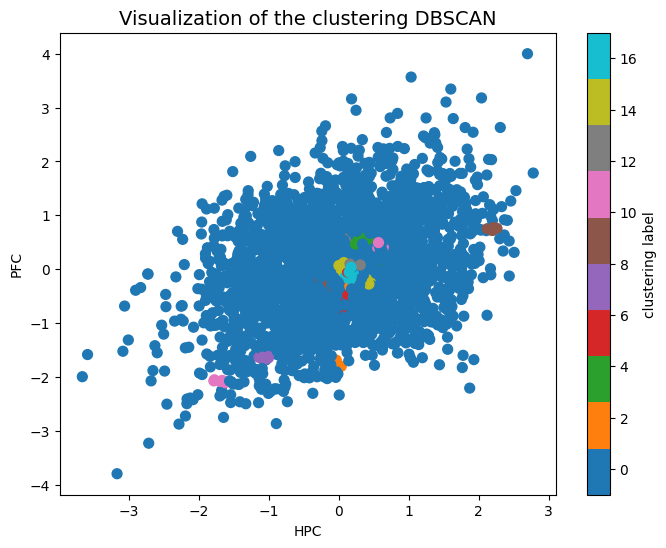

In [37]:
visualise(X,clustering.labels_, 'DBSCAN')

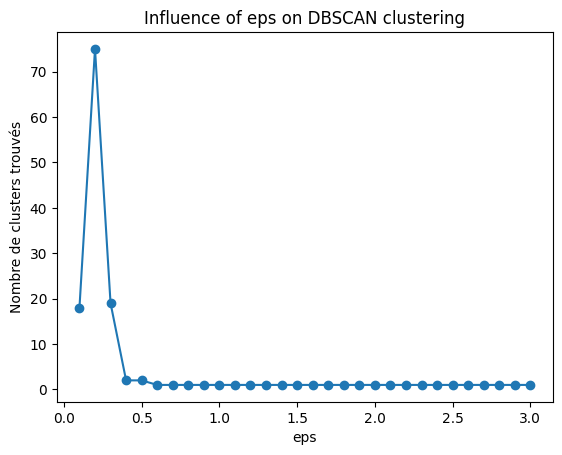

In [38]:
eps_values = np.linspace(0.1, 3, 30)
n_clusters = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5).fit(X)
    n_clusters.append(len(set(db.labels_)) - (1 if -1 in db.labels_ else 0))

plt.plot(eps_values, n_clusters, marker='o')
plt.xlabel("eps")
plt.ylabel("Nombre de clusters trouvés")
plt.title("Influence of eps on DBSCAN clustering")
plt.show()


## TEST hdbscan 

In [39]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=3)
labels = clusterer.fit_predict(X)

c:\Users\Pc\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Pc\anaconda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [40]:
labels = clusterer.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 183
Estimated number of noise points: 1061


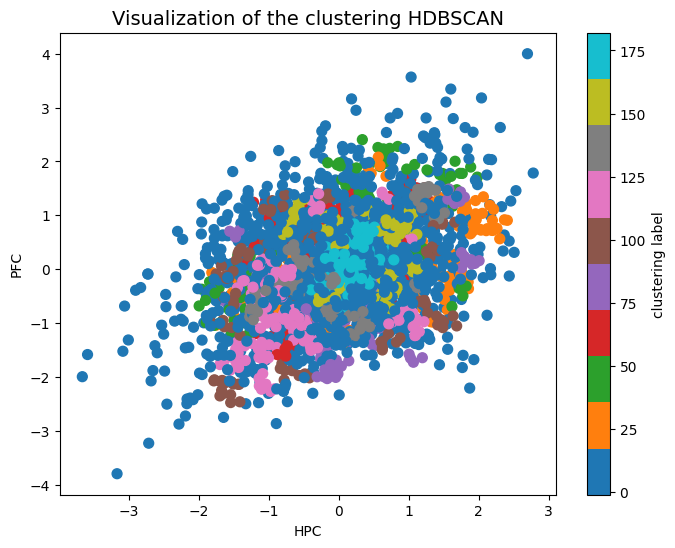

In [42]:
visualise(X,labels,'HDBSCAN')